<a href="https://colab.research.google.com/github/BimantaraDwiCahyo/PCVK_2024_07/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Gamma Correction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai gamma: 3


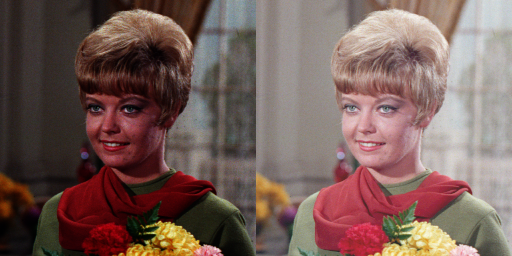

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Week5/female.tiff')
#gamma inverted
gamma = 1/gamma
gamma_corrected = np.array(255*(original / 255) ** gamma, dtype='uint8')
# gamma_corrected = np.array(255*(original / 255) ** gamma, dtype='uint8')

final_frame = cv.hconcat((original, gamma_corrected))
cv2_imshow(final_frame)

## 2. Image Depth

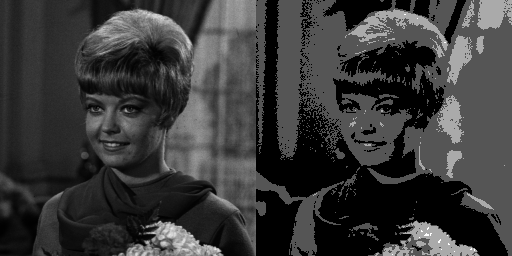

In [4]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Week5/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
for i in range(len(original)):
  for j in range(len(original[0])):
    depth_image[i][j] = np.round(original[i][j]/level)*level

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

## 3. Average Denoising

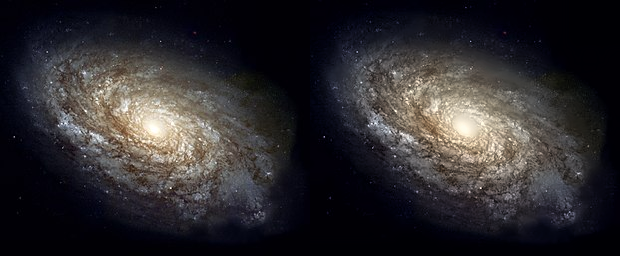

PSNR:  42.85416143448444


In [5]:
galaxy_original = cv.imread('/content/drive/MyDrive/PCVK/Week5/galaxy.jpg')
#denoising
galaxy_denoising = cv.fastNlMeansDenoisingColored(galaxy_original,None,3,3,7,21)
final_frame = cv.hconcat((galaxy_original, galaxy_denoising))
cv2_imshow(final_frame)
psnr = cv.PSNR(galaxy_original, galaxy_denoising)
print("PSNR: ", psnr)

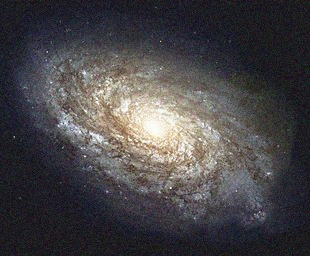

PSNR 5 images:  19.530552602668546


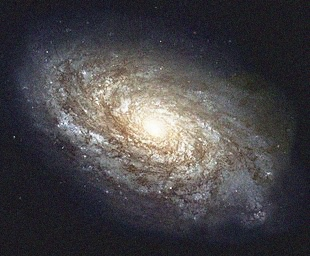

PSNR 10 images:  19.73021101179656


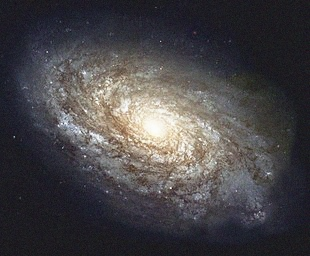

PSNR 20 images:  19.839615749811006


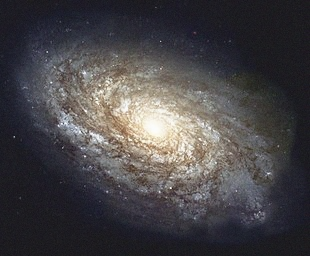

PSNR 40 images:  19.89159140156253


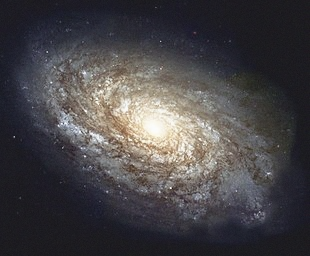

PSNR 80 images:  19.919054563605073


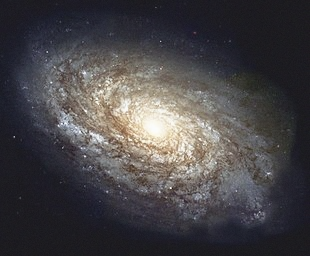

PSNR 100 images:  19.92196095594035


In [6]:
import glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Week5/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

#average denoising using average of 5, 10, 20, 40, 80, 100 images
num_img = [5, 10, 20, 40, 80, 100]
avg = []
for i in num_img:
  sum = np.zeros((256, 310, 3), dtype=np.float64)
  for j in range(i):
    sum = sum + cv_img[j]
  avg.append(np.uint8(sum/i))
  cv2_imshow(np.uint8(sum/i))
  psnr = cv.PSNR(galaxy_original, np.uint8(sum/i))
  print("PSNR", i, "images: ", psnr)

## 4. Image Masking

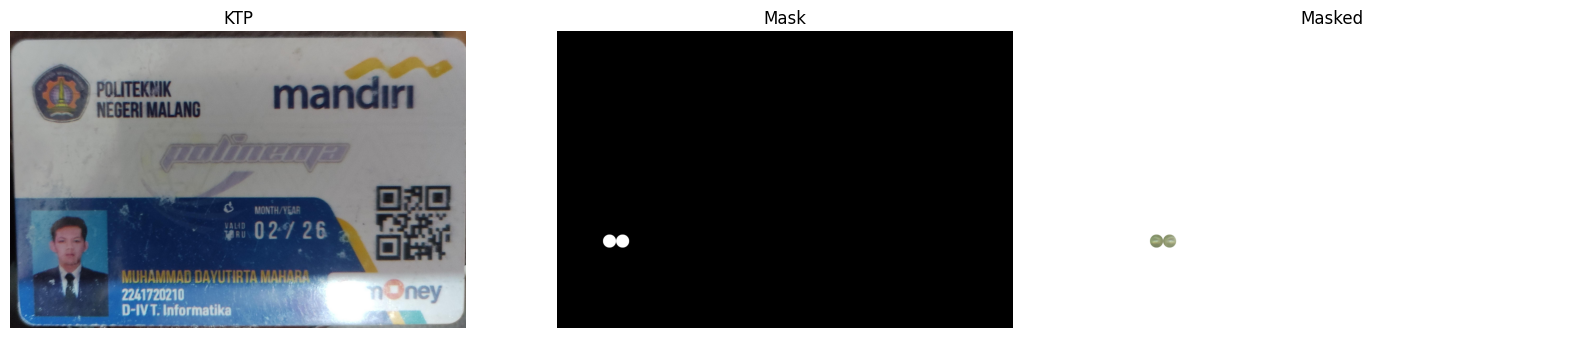

In [22]:
ktm = cv.imread('/content/drive/MyDrive/PCVK/Week5/ktm.jpeg')
mask = np.zeros(ktm.shape[:2], dtype="uint8")
mask = cv.circle(mask, (400,1600), 50, 255, -1)
mask = cv.circle(mask, (500,1600), 50, 255, -1)
masked = cv.bitwise_not(cv.bitwise_and(ktm, ktm, mask=mask))

mask = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
masked = cv.cvtColor(masked, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(ktm[:,:,::-1]), plt.title('ktm')
plt.axis('off')
plt.subplot(132), plt.imshow(mask[:,:,::-1]), plt.title('Mask')
plt.axis('off')
plt.subplot(133), plt.imshow(masked[:,:,::-1]), plt.title('Masked')
plt.axis('off')
plt.show()

## 5. Others Operation

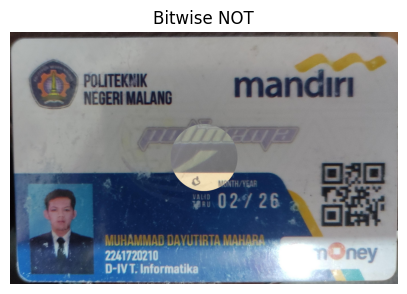

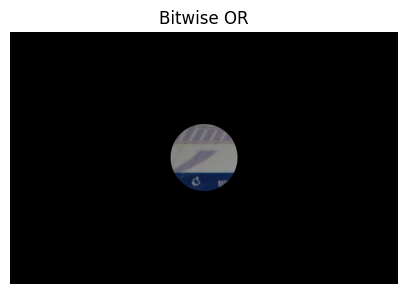

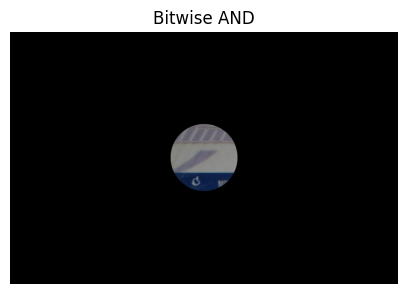

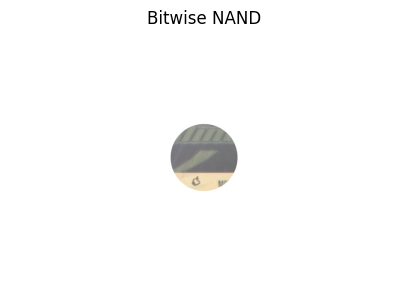

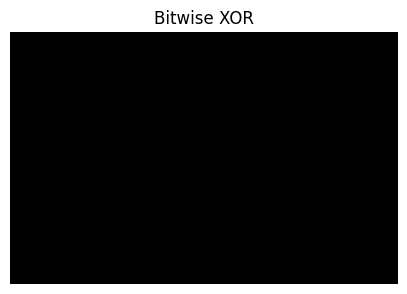

In [26]:
def show_image_with_matplotlib(image, title="Image"):
    # Ubah ke RGB untuk kompatibilitas dengan Matplotlib
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))  # Ubah ukuran gambar di sini
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

ktm = cv.imread('/content/drive/MyDrive/PCVK/Week5/ktm.jpeg')
mask = np.zeros(ktm.shape[:2], dtype="uint8")
mask = cv.circle(mask, (ktm.shape[1]//2, ktm.shape[0]//2), 300, 255, -1)

# Test bitwise not
masked = cv.bitwise_not(ktm, ktm, mask=mask)
show_image_with_matplotlib(masked, "Bitwise NOT")

# Test bitwise or
ktm = cv.imread('/content/drive/MyDrive/PCVK/Week5/ktm.jpeg')
masked = cv.bitwise_or(ktm, ktm, mask=mask)
show_image_with_matplotlib(masked, "Bitwise OR")

# Test bitwise and
ktm = cv.imread('/content/drive/MyDrive/PCVK/Week5/ktm.jpeg')
masked = cv.bitwise_and(ktm, ktm, mask=mask)
show_image_with_matplotlib(masked, "Bitwise AND")

# Test bitwise nand
ktm = cv.imread('/content/drive/MyDrive/PCVK/Week5/ktm.jpeg')
masked = cv.bitwise_not(cv.bitwise_and(ktm, ktm, mask=mask))
show_image_with_matplotlib(masked, "Bitwise NAND")

# Test bitwise xor
ktm = cv.imread('/content/drive/MyDrive/PCVK/Week5/ktm.jpeg')
masked = cv.bitwise_xor(ktm, ktm, mask=mask)
show_image_with_matplotlib(masked, "Bitwise XOR")